<a href="https://colab.research.google.com/github/EttarbaouiBadr/Prediction-Des-Prix-Des-Appartements/blob/main/handling_missing_value_avito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
# Load my dataset
avito_data = pd.read_csv('/content/drive/MyDrive/DataSet/merged_data_csv.csv', encoding='latin1')
avito_data

,House Name,Prix,Équipements,Type,Secteur,Frais de syndic / mois,Surface habitable,Étage,Salons,Caution,Âge du bien,Horaire d'arrivée,Horaire de départ
0,House Name Not Found,Price Not Found,équipements non mentionnés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,appartement meublé à louer,5 000 DH,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,150.0,82.0,4,1.0,2 mois,NaN,NaN,NaN
2,House Name Not Found,Price Not Found,équipements non mentionnés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Appartement à vendre 84 m² à Mohammedia,1 300 000 DH,"Ascenseur, Balcon, Meublé, Terrasse, Climatisa...","Appartements, à vendre",Quartier du Parc,NaN,84.0,1,1.0,NaN,Neuf,NaN,NaN
4,House Name Not Found,Price Not Found,équipements non mentionnés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36595,Appart 86m2 à Gueliz pour habitation ou commer...,855 000 DH,équipements non mentionnés,"Appartements, à vendre",Guéliz,NaN,86.0,3,NaN,NaN,NaN,NaN,NaN
36596,Appartement à vendre 59 a 72 m² à louizia,380 000 DH,"Balcon, Cuisine équipée, Terrasse","Appartements, à vendre",Autre secteur,NaN,72.0,2,1.0,NaN,Neuf,NaN,NaN
36597,App meublé avec wifi et ascenseur à agadir,300 DH /Nuit,"Meublé, Parking, Serviettes, Télévision, Chauf...","Locations de vacances, à louer",Anza,NaN,NaN,NaN,NaN,NaN,NaN,12:00,11:00
36598,appartement en location a ifrane,350 DH,"Concierge, Sécurité, Parking, Cuisine équipée,...","Appartements, à louer",La Prairie,NaN,NaN,Rez de chaussée,2.0,NaN,NaN,NaN,NaN


In [5]:
avito_data.shape

(36600, 13)

In [6]:
avito_data.columns

Index(['House Name', 'Prix', 'Équipements', 'Type', 'Secteur',
       'Frais de syndic / mois', 'Surface habitable', 'Étage', 'Salons',
       'Caution', 'Âge du bien', 'Horaire d'arrivée', 'Horaire de départ'],
      dtype='object')

In [7]:
avito_data.dtypes

House Name                 object
Prix                       object
Équipements                object
Type                       object
Secteur                    object
Frais de syndic / mois    float64
Surface habitable         float64
Étage                      object
Salons                    float64
Caution                    object
Âge du bien                object
Horaire d'arrivée          object
Horaire de départ          object
dtype: object

In [8]:
#number of duplicated lignes in my dataset
avito_data.duplicated().sum()

13293

In [9]:
#delete all duplicates lignes
avito_data = avito_data.drop_duplicates()

In [10]:
avito_data.duplicated().sum()

0

In [11]:
avito_data.shape

(23307, 13)

In [12]:

# How many null values in each col
avito_data.isnull().sum()

House Name                    0
Prix                          0
Équipements                   0
Type                          1
Secteur                     101
Frais de syndic / mois    20502
Surface habitable         11046
Étage                     10776
Salons                    10908
Caution                   18762
Âge du bien               17739
Horaire d'arrivée         14035
Horaire de départ         14135
dtype: int64

In [13]:
avito_data.isnull().sum().sum()

118005

At the moment when I was scraping my data from avito sit web, I make a mistake that I put a condition when it was a null value or there is no value of a column replaces with a word or a sentence like 'Prix non spécifié' etc..
So now I will replace each character like that with a null value to have the real number of null values in my dataset to clean it and preprocecsse it.

In [14]:
df = avito_data
is_non_numeric = df['Prix'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()

# Count the number of non-digital lines
nombre_de_lignes_non_numeriques = is_non_numeric.sum()

print(f"Le nombre de lignes non numériques dans la colonne 'Colonne' est : {nombre_de_lignes_non_numeriques}")

Le nombre de lignes non numériques dans la colonne 'Colonne' est : 23307


In [15]:


# Specify the values you are looking for in a list
valeurs_recherchees = ['Prix non spécifié', 'Price Not Found']

# Use the . value_counts() method to count occurrences
comptage = df['Prix'].isin(valeurs_recherchees).sum()

print(f"Les valeurs {', '.join(valeurs_recherchees)} se répètent {comptage} fois dans la colonne 'Colonne'.")


Les valeurs Prix non spécifié, Price Not Found se répètent 1920 fois dans la colonne 'Colonne'.


In [16]:
import pandas as pd
import numpy as np




# the values to replace with NaN
valeurs_recherchees = ['Prix non spécifié', 'Price Not Found']

# Use a boolean filter to identify the cells to replace with NaN
filtre = df['Prix'].isin(valeurs_recherchees)

# Replace the specified values with NaN
df.loc[filtre, 'Prix'] = np.nan

print("DataFrame original:")
print(df)


DataFrame original:
                                              House Name          Prix  \
0                                   House Name Not Found           NaN   
1                            appartement meublé à louer       5 000 DH   
3                Appartement à vendre 84 m² à Mohammedia  1 300 000 DH   
6                    Appartement à vendre 75 m² à Saidia    490 000 DH   
8                        appart calme à centre de ville   250 DH /Nuit   
...                                                  ...           ...   
36588  Appartement de 3 chambres en location à harhoura       6 500 DH   
36590          appartements de Lux en location à ifrane         300 DH   
36591             Appartement à vendre 86 m² à harhoura   1 100 000 DH   
36592   APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5    890 000 DH   
36597         App meublé avec wifi et ascenseur à agadir  300 DH /Nuit   

                                             Équipements  \
0                             é

In [17]:
df

,House Name,Prix,Équipements,Type,Secteur,Frais de syndic / mois,Surface habitable,Étage,Salons,Caution,Âge du bien,Horaire d'arrivée,Horaire de départ
0,House Name Not Found,NaN,équipements non mentionnés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,appartement meublé à louer,5 000 DH,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,150.0,82.0,4,1.0,2 mois,NaN,NaN,NaN
3,Appartement à vendre 84 m² à Mohammedia,1 300 000 DH,"Ascenseur, Balcon, Meublé, Terrasse, Climatisa...","Appartements, à vendre",Quartier du Parc,NaN,84.0,1,1.0,NaN,Neuf,NaN,NaN
6,Appartement à vendre 75 m² à Saidia,490 000 DH,"Terrasse, Balcon","Appartements, à vendre",Toute la ville,NaN,75.0,1,1.0,NaN,NaN,NaN,NaN
8,appart calme à centre de ville,250 DH /Nuit,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,NaN,NaN,NaN,NaN,NaN,NaN,14:00,12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36588,Appartement de 3 chambres en location à harhoura,6 500 DH,"Sécurité, Cuisine équipée, Climatisation, Conc...","Appartements, à vendre",Harhoura,NaN,130.0,2,2.0,NaN,1-5 ans,NaN,NaN
36590,appartements de Lux en location à ifrane,300 DH,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,NaN,70.0,2,1.0,Aucune,NaN,NaN,NaN
36591,Appartement à vendre 86 m² à harhoura,1 100 000 DH,"Balcon, Cuisine équipée, Climatisation, Concie...","Appartements, à vendre",Harhoura,NaN,86.0,3,1.0,NaN,Neuf,NaN,NaN
36592,APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5,890 000 DH,"Ascenseur, Cuisine équipée, Concierge, Parking...","Appartements, à vendre",Mimosas,NaN,128.0,7+,2.0,NaN,Neuf,NaN,NaN


In [18]:
df.isnull().sum ()

House Name                    0
Prix                       1920
Équipements                   0
Type                          1
Secteur                     101
Frais de syndic / mois    20502
Surface habitable         11046
Étage                     10776
Salons                    10908
Caution                   18762
Âge du bien               17739
Horaire d'arrivée         14035
Horaire de départ         14135
dtype: int64

In [19]:
import pandas as pd
import numpy as np



# the values to replace with NaN
valeurs_recherchees = ['équipements non mentionnés']

# Use a boolean filter to identify the cells to replace with NaN
filtre = df['Équipements'].isin(valeurs_recherchees)

# Replace the specified values with NaN
df.loc[filtre, 'Équipements'] = np.nan

print("DataFrame original:")
print(df)


DataFrame original:
                                              House Name          Prix  \
0                                   House Name Not Found           NaN   
1                            appartement meublé à louer       5 000 DH   
3                Appartement à vendre 84 m² à Mohammedia  1 300 000 DH   
6                    Appartement à vendre 75 m² à Saidia    490 000 DH   
8                        appart calme à centre de ville   250 DH /Nuit   
...                                                  ...           ...   
36588  Appartement de 3 chambres en location à harhoura       6 500 DH   
36590          appartements de Lux en location à ifrane         300 DH   
36591             Appartement à vendre 86 m² à harhoura   1 100 000 DH   
36592   APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5    890 000 DH   
36597         App meublé avec wifi et ascenseur à agadir  300 DH /Nuit   

                                             Équipements  \
0                              

In [20]:
df.isnull().sum ()

House Name                    0
Prix                       1920
Équipements                  75
Type                          1
Secteur                     101
Frais de syndic / mois    20502
Surface habitable         11046
Étage                     10776
Salons                    10908
Caution                   18762
Âge du bien               17739
Horaire d'arrivée         14035
Horaire de départ         14135
dtype: int64

In [21]:
import pandas as pd
import numpy as np



# Specify the values you want to replace with NaN
valeurs_recherchees = ['Aucune']

# Use a boolean filter to identify the cells to replace with NaN
filtre = df['Caution'].isin(valeurs_recherchees)

# Replace the specified values with NaN
df.loc[filtre, 'Caution'] = np.nan

print("DataFrame original:")
print(df)


DataFrame original:
                                              House Name          Prix  \
0                                   House Name Not Found           NaN   
1                            appartement meublé à louer       5 000 DH   
3                Appartement à vendre 84 m² à Mohammedia  1 300 000 DH   
6                    Appartement à vendre 75 m² à Saidia    490 000 DH   
8                        appart calme à centre de ville   250 DH /Nuit   
...                                                  ...           ...   
36588  Appartement de 3 chambres en location à harhoura       6 500 DH   
36590          appartements de Lux en location à ifrane         300 DH   
36591             Appartement à vendre 86 m² à harhoura   1 100 000 DH   
36592   APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5    890 000 DH   
36597         App meublé avec wifi et ascenseur à agadir  300 DH /Nuit   

                                             Équipements  \
0                              

In [22]:
df.isnull().sum()

House Name                    0
Prix                       1920
Équipements                  75
Type                          1
Secteur                     101
Frais de syndic / mois    20502
Surface habitable         11046
Étage                     10776
Salons                    10908
Caution                   19431
Âge du bien               17739
Horaire d'arrivée         14035
Horaire de départ         14135
dtype: int64

In [23]:
df.shape

(23307, 13)

In [24]:
avito_data.shape

(23307, 13)

<Axes: >

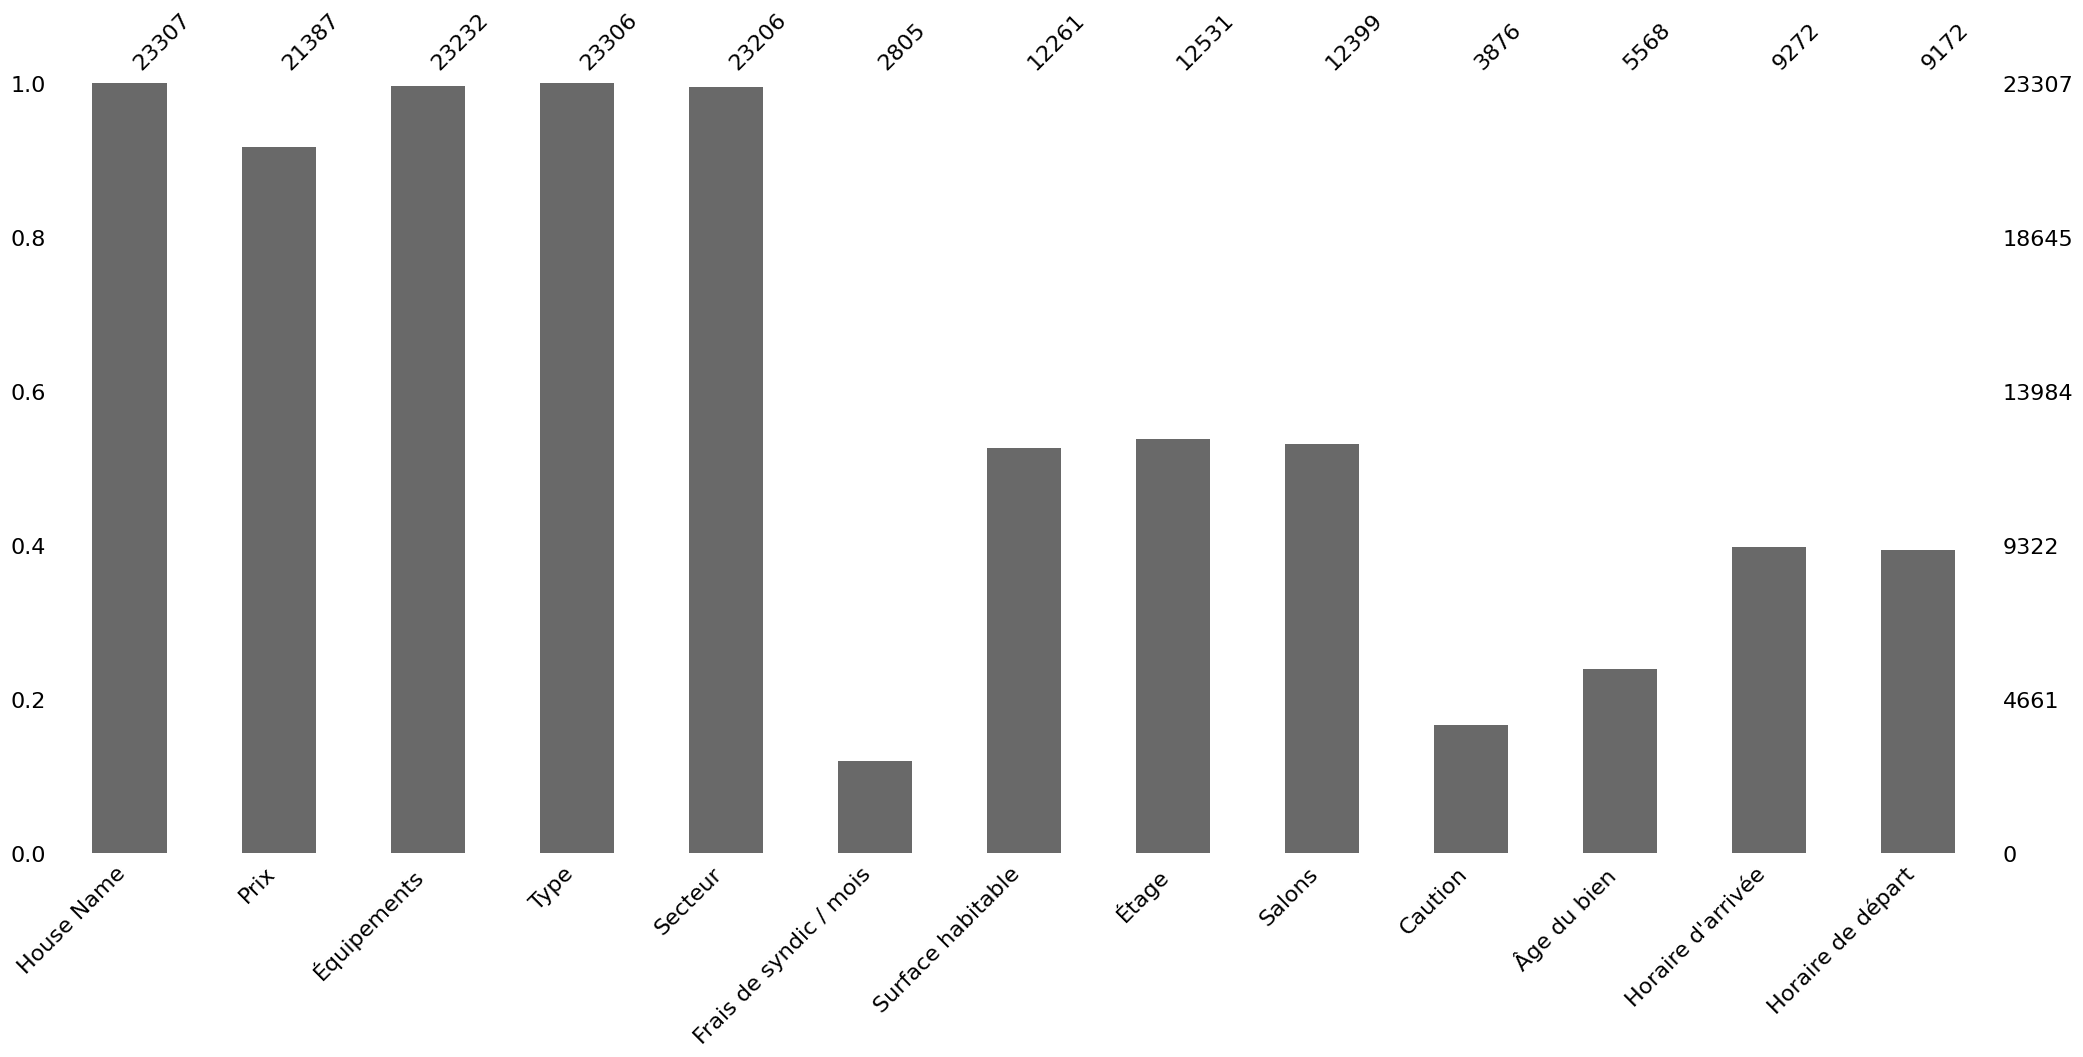

In [25]:
import missingno as msno
msno.bar(avito_data)

we see that there are 3 columns that have many null values and with the smallest knowledge in the metier they don't impact to the price of the house
so I decide to delete them

In [26]:
df=avito_data.drop(['Âge du bien','Caution','Frais de syndic / mois'],axis=1)
df.isnull().sum()

House Name               0
Prix                  1920
Équipements             75
Type                     1
Secteur                101
Surface habitable    11046
Étage                10776
Salons               10908
Horaire d'arrivée    14035
Horaire de départ    14135
dtype: int64

In [27]:
avito_data = df

<Axes: >

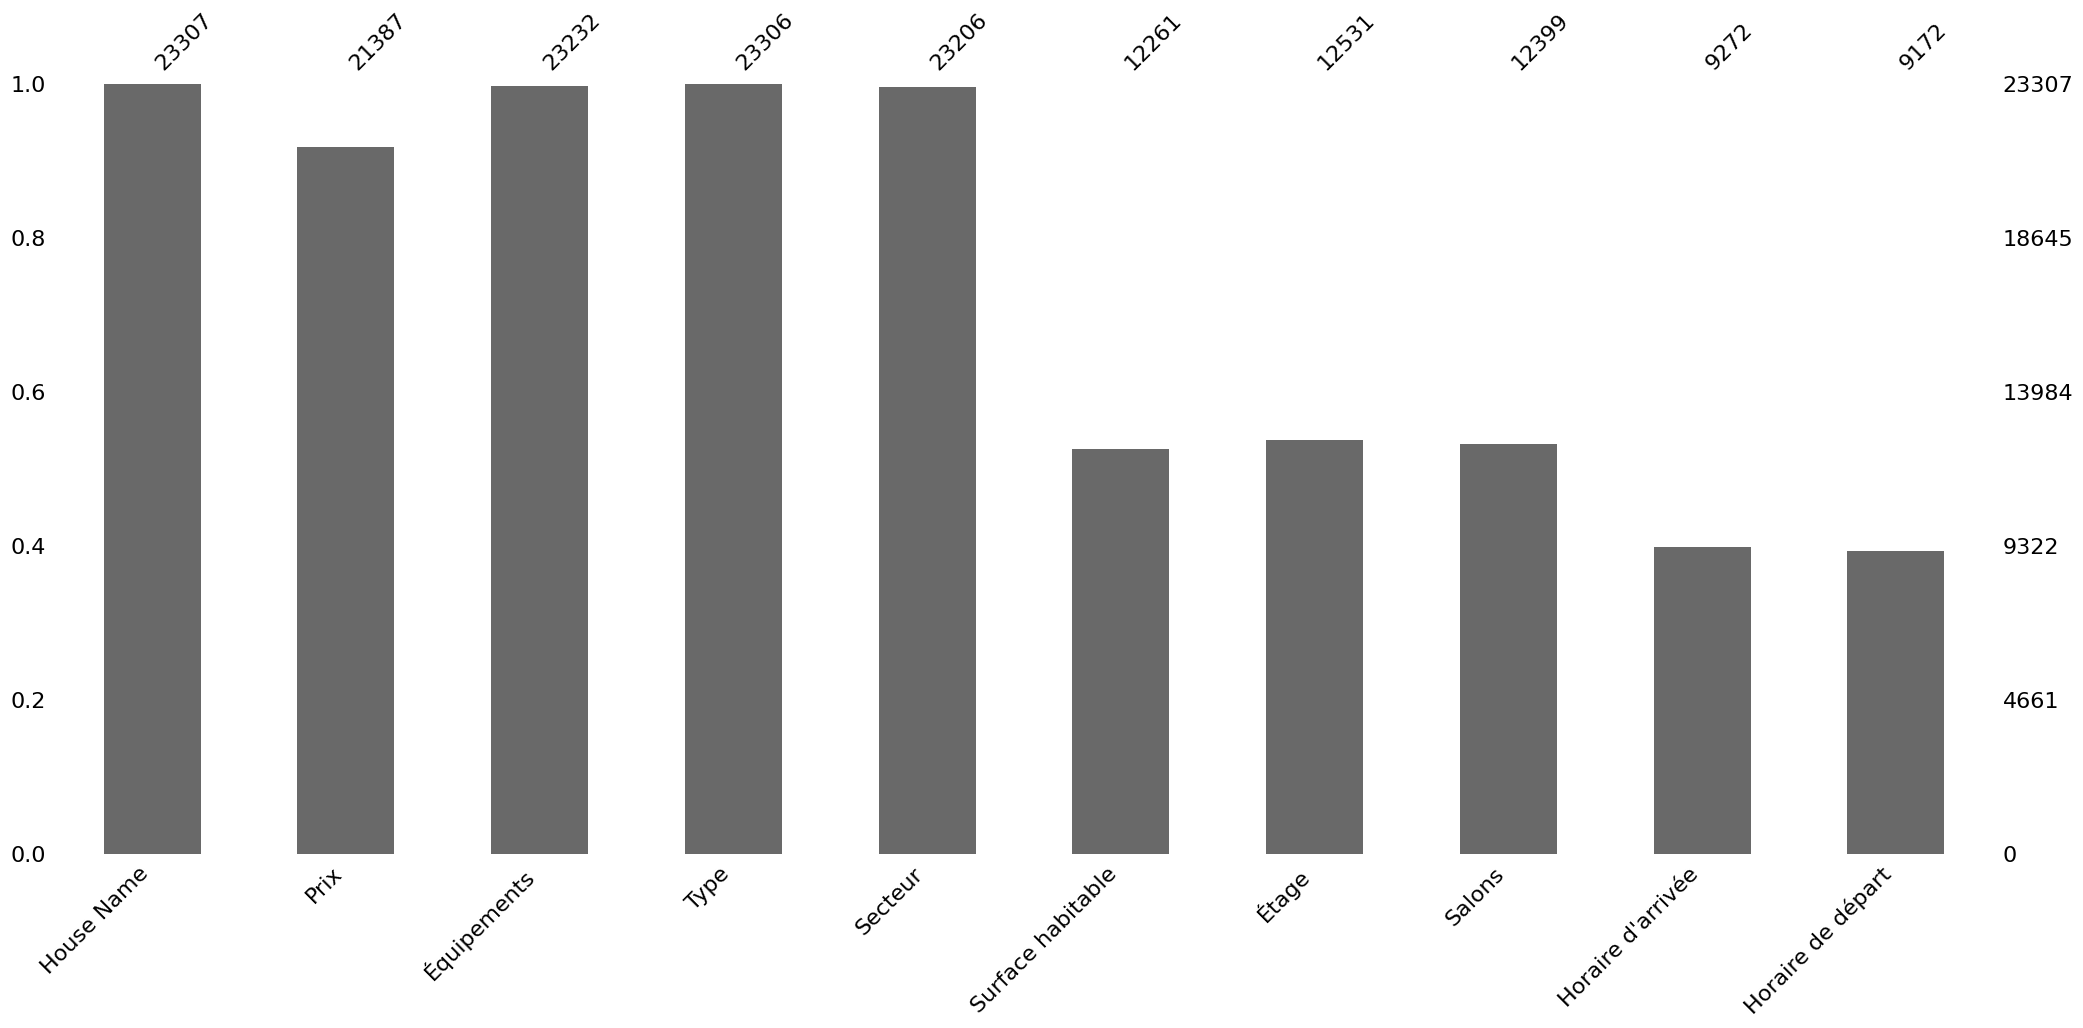

In [28]:
import missingno as msno
msno.bar(avito_data)

In [29]:
# Counting words in each cell of the 'equipment' column (separated by commas) and storing the result in 'equipments_nbr'
avito_data['equipments_nbr'] = avito_data['Équipements'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Display the DataFrame with the new column
print(avito_data)





                                              House Name          Prix  \
0                                   House Name Not Found           NaN   
1                            appartement meublé à louer       5 000 DH   
3                Appartement à vendre 84 m² à Mohammedia  1 300 000 DH   
6                    Appartement à vendre 75 m² à Saidia    490 000 DH   
8                        appart calme à centre de ville   250 DH /Nuit   
...                                                  ...           ...   
36588  Appartement de 3 chambres en location à harhoura       6 500 DH   
36590          appartements de Lux en location à ifrane         300 DH   
36591             Appartement à vendre 86 m² à harhoura   1 100 000 DH   
36592   APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5    890 000 DH   
36597         App meublé avec wifi et ascenseur à agadir  300 DH /Nuit   

                                             Équipements  \
0                                                  

In [30]:
avito_data

,House Name,Prix,Équipements,Type,Secteur,Surface habitable,Étage,Salons,Horaire d'arrivée,Horaire de départ,equipments_nbr
0,House Name Not Found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,appartement meublé à louer,5 000 DH,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,82.0,4,1.0,NaN,NaN,5
3,Appartement à vendre 84 m² à Mohammedia,1 300 000 DH,"Ascenseur, Balcon, Meublé, Terrasse, Climatisa...","Appartements, à vendre",Quartier du Parc,84.0,1,1.0,NaN,NaN,6
6,Appartement à vendre 75 m² à Saidia,490 000 DH,"Terrasse, Balcon","Appartements, à vendre",Toute la ville,75.0,1,1.0,NaN,NaN,2
8,appart calme à centre de ville,250 DH /Nuit,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,NaN,NaN,NaN,14:00,12:00,12
...,...,...,...,...,...,...,...,...,...,...,...
36588,Appartement de 3 chambres en location à harhoura,6 500 DH,"Sécurité, Cuisine équipée, Climatisation, Conc...","Appartements, à vendre",Harhoura,130.0,2,2.0,NaN,NaN,9
36590,appartements de Lux en location à ifrane,300 DH,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,70.0,2,1.0,NaN,NaN,10
36591,Appartement à vendre 86 m² à harhoura,1 100 000 DH,"Balcon, Cuisine équipée, Climatisation, Concie...","Appartements, à vendre",Harhoura,86.0,3,1.0,NaN,NaN,6
36592,APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5,890 000 DH,"Ascenseur, Cuisine équipée, Concierge, Parking...","Appartements, à vendre",Mimosas,128.0,7+,2.0,NaN,NaN,7


In [31]:
occurrences = avito_data['Type'].value_counts()
occurrences

Locations de vacances, à louer       10775
Appartements, à louer                 6302
Appartements, à vendre                6203
Appartements, demande de location       24
Colocations, à louer                     2
Name: Type, dtype: int64

In [32]:


# Utilisez la méthode drop pour supprimer les lignes contenant la valeur spécifiée
df1 = df[df['Type'] != 'Appartements, demande de location']


df1

,House Name,Prix,Équipements,Type,Secteur,Surface habitable,Étage,Salons,Horaire d'arrivée,Horaire de départ,equipments_nbr
0,House Name Not Found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,appartement meublé à louer,5 000 DH,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,82.0,4,1.0,NaN,NaN,5
3,Appartement à vendre 84 m² à Mohammedia,1 300 000 DH,"Ascenseur, Balcon, Meublé, Terrasse, Climatisa...","Appartements, à vendre",Quartier du Parc,84.0,1,1.0,NaN,NaN,6
6,Appartement à vendre 75 m² à Saidia,490 000 DH,"Terrasse, Balcon","Appartements, à vendre",Toute la ville,75.0,1,1.0,NaN,NaN,2
8,appart calme à centre de ville,250 DH /Nuit,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,NaN,NaN,NaN,14:00,12:00,12
...,...,...,...,...,...,...,...,...,...,...,...
36588,Appartement de 3 chambres en location à harhoura,6 500 DH,"Sécurité, Cuisine équipée, Climatisation, Conc...","Appartements, à vendre",Harhoura,130.0,2,2.0,NaN,NaN,9
36590,appartements de Lux en location à ifrane,300 DH,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,70.0,2,1.0,NaN,NaN,10
36591,Appartement à vendre 86 m² à harhoura,1 100 000 DH,"Balcon, Cuisine équipée, Climatisation, Concie...","Appartements, à vendre",Harhoura,86.0,3,1.0,NaN,NaN,6
36592,APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5,890 000 DH,"Ascenseur, Cuisine équipée, Concierge, Parking...","Appartements, à vendre",Mimosas,128.0,7+,2.0,NaN,NaN,7


In [33]:
df1['Type'].unique()

array([nan, 'Appartements, à louer', 'Appartements, à vendre',
       'Locations de vacances, à louer', 'Colocations, à louer'],
      dtype=object)

In [34]:
# Utilisez la méthode drop pour supprimer les lignes contenant la valeur spécifiée
df2 = df1[df1['Type'] != 'Colocations, à louer']


df2

,House Name,Prix,Équipements,Type,Secteur,Surface habitable,Étage,Salons,Horaire d'arrivée,Horaire de départ,equipments_nbr
0,House Name Not Found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,appartement meublé à louer,5 000 DH,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,82.0,4,1.0,NaN,NaN,5
3,Appartement à vendre 84 m² à Mohammedia,1 300 000 DH,"Ascenseur, Balcon, Meublé, Terrasse, Climatisa...","Appartements, à vendre",Quartier du Parc,84.0,1,1.0,NaN,NaN,6
6,Appartement à vendre 75 m² à Saidia,490 000 DH,"Terrasse, Balcon","Appartements, à vendre",Toute la ville,75.0,1,1.0,NaN,NaN,2
8,appart calme à centre de ville,250 DH /Nuit,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,NaN,NaN,NaN,14:00,12:00,12
...,...,...,...,...,...,...,...,...,...,...,...
36588,Appartement de 3 chambres en location à harhoura,6 500 DH,"Sécurité, Cuisine équipée, Climatisation, Conc...","Appartements, à vendre",Harhoura,130.0,2,2.0,NaN,NaN,9
36590,appartements de Lux en location à ifrane,300 DH,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,70.0,2,1.0,NaN,NaN,10
36591,Appartement à vendre 86 m² à harhoura,1 100 000 DH,"Balcon, Cuisine équipée, Climatisation, Concie...","Appartements, à vendre",Harhoura,86.0,3,1.0,NaN,NaN,6
36592,APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5,890 000 DH,"Ascenseur, Cuisine équipée, Concierge, Parking...","Appartements, à vendre",Mimosas,128.0,7+,2.0,NaN,NaN,7


In [35]:
d=df2['Type'].value_counts()
d

Locations de vacances, à louer    10775
Appartements, à louer              6302
Appartements, à vendre             6203
Name: Type, dtype: int64

In [36]:
df2

,House Name,Prix,Équipements,Type,Secteur,Surface habitable,Étage,Salons,Horaire d'arrivée,Horaire de départ,equipments_nbr
0,House Name Not Found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,appartement meublé à louer,5 000 DH,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,82.0,4,1.0,NaN,NaN,5
3,Appartement à vendre 84 m² à Mohammedia,1 300 000 DH,"Ascenseur, Balcon, Meublé, Terrasse, Climatisa...","Appartements, à vendre",Quartier du Parc,84.0,1,1.0,NaN,NaN,6
6,Appartement à vendre 75 m² à Saidia,490 000 DH,"Terrasse, Balcon","Appartements, à vendre",Toute la ville,75.0,1,1.0,NaN,NaN,2
8,appart calme à centre de ville,250 DH /Nuit,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,NaN,NaN,NaN,14:00,12:00,12
...,...,...,...,...,...,...,...,...,...,...,...
36588,Appartement de 3 chambres en location à harhoura,6 500 DH,"Sécurité, Cuisine équipée, Climatisation, Conc...","Appartements, à vendre",Harhoura,130.0,2,2.0,NaN,NaN,9
36590,appartements de Lux en location à ifrane,300 DH,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,70.0,2,1.0,NaN,NaN,10
36591,Appartement à vendre 86 m² à harhoura,1 100 000 DH,"Balcon, Cuisine équipée, Climatisation, Concie...","Appartements, à vendre",Harhoura,86.0,3,1.0,NaN,NaN,6
36592,APPARTEMENT DE 136 M2 SUR LE BOULEVARD MOHAMED 5,890 000 DH,"Ascenseur, Cuisine équipée, Concierge, Parking...","Appartements, à vendre",Mimosas,128.0,7+,2.0,NaN,NaN,7


In [37]:
 # Remplacez "votre_fichier.csv" par le nom de votre fichier

# Supprimer les lignes avec la valeur spécifiée dans la colonne "Type"
df2 = df2[df2['Type'] != 'Appartements, à vendre']





In [38]:
df2

,House Name,Prix,Équipements,Type,Secteur,Surface habitable,Étage,Salons,Horaire d'arrivée,Horaire de départ,equipments_nbr
0,House Name Not Found,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,appartement meublé à louer,5 000 DH,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,82.0,4,1.0,NaN,NaN,5
8,appart calme à centre de ville,250 DH /Nuit,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,NaN,NaN,NaN,14:00,12:00,12
11,appart à louer pour les famille,250 DH /Nuit,"Piscine, Meublé, Climatisation, Télévision, WI...","Locations de vacances, à louer",Guéliz,NaN,NaN,NaN,14:00,12:00,12
12,appart calme à coter de la gare,250 DH /Nuit,"Ascenseur, Sécurité, Machine à laver, Cuisine ...","Locations de vacances, à louer",Guéliz,NaN,NaN,NaN,14:00,12:00,12
...,...,...,...,...,...,...,...,...,...,...,...
36584,Appartement à louer 60 m² à Tanger,4 300 DH,"Concierge, Balcon, Parking, Cuisine équipée, M...","Appartements, à louer",Du Golf,60.0,5,1.0,NaN,NaN,8
36586,Magnifique appartement vue sur mer à mehdia,1 400 DH /Nuit,"Chauffage, Sécurité, Parking, Meublé, Concierg...","Locations de vacances, à louer",Autre secteur,NaN,NaN,NaN,14:00,12:00,12
36587,Belle appartement au centre ville,250 DH /Nuit,"Meublé, Cuisine équipée, Machine à laver, Park...","Locations de vacances, à louer",Agdal,NaN,NaN,NaN,12:30,12:00,12
36590,appartements de Lux en location à ifrane,300 DH,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,70.0,2,1.0,NaN,NaN,10


In [39]:
d=df2['Type'].value_counts()
d

Locations de vacances, à louer    10775
Appartements, à louer              6302
Name: Type, dtype: int64

In [40]:
df2 = df2.dropna(subset=['Type','Équipements','Secteur'])

In [41]:
df2.isnull().sum()

House Name               0
Prix                  1099
Équipements              0
Type                     0
Secteur                  0
Surface habitable    11013
Étage                10747
Salons               10747
Horaire d'arrivée     7765
Horaire de départ     7865
equipments_nbr           0
dtype: int64

In [42]:
df3 = pd.DataFrame(df2)

# Affichez le DataFrame original
print("DataFrame original:")
print(df3)

# Filtrez les lignes où la valeur dans la colonne 'Prix' est nulle
df_null_prix = df3[df3['Prix'].isnull()]

# Affichez les lignes où la valeur dans la colonne 'Prix' est nulle
print("\nLignes où la valeur dans la colonne 'Prix' est nulle:")
print(df_null_prix)

# Supprimez les lignes où la valeur dans la colonne 'Prix' est nulle du DataFrame d'origine
df4 = df3.dropna(subset=['Prix'])

# Affichez le DataFrame après la suppression
print("\nDataFrame après la suppression des lignes où la valeur dans la colonne 'Prix' est nulle:")
print(df3)

# Créez un autre DataFrame avec les lignes où la valeur dans la colonne 'Prix' est nulle
df_null_prix_separe = pd.DataFrame(df_null_prix)

df_null_prix_separe.to_csv('valeurs_nulles_prix.csv', index=False)

DataFrame original:
                                        House Name            Prix  \
1                      appartement meublé à louer         5 000 DH   
8                  appart calme à centre de ville     250 DH /Nuit   
11                appart à louer pour les famille     250 DH /Nuit   
12                appart calme à coter de la gare     250 DH /Nuit   
13                   appart à coter de carre eden     250 DH /Nuit   
...                                            ...             ...   
36584           Appartement à louer 60 m² à Tanger        4 300 DH   
36586  Magnifique appartement vue sur mer à mehdia  1 400 DH /Nuit   
36587           Belle appartement au centre ville     250 DH /Nuit   
36590    appartements de Lux en location à ifrane           300 DH   
36597   App meublé avec wifi et ascenseur à agadir    300 DH /Nuit   

                                             Équipements  \
1      Sécurité, Parking, Ascenseur, Cuisine équipée,...   
8      Serviettes, 

In [43]:
df3.isnull().sum()

House Name               0
Prix                  1099
Équipements              0
Type                     0
Secteur                  0
Surface habitable    11013
Étage                10747
Salons               10747
Horaire d'arrivée     7765
Horaire de départ     7865
equipments_nbr           0
dtype: int64

In [44]:
df4 = df3

In [45]:
occurrences1 = df4['Type'].value_counts()
occurrences1

Locations de vacances, à louer    10747
Appartements, à louer              6275
Name: Type, dtype: int64

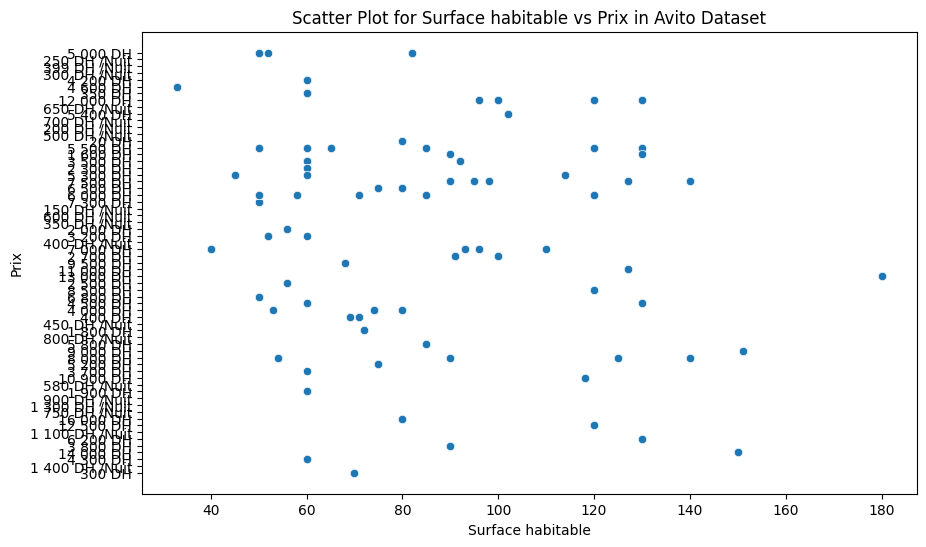

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assurez-vous que votre DataFrame 'd' existe et contient les colonnes 'Surface habitable' et 'Prix'

# Visualize the relationship between 'Surface habitable' and 'Prix' using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Surface habitable', y='Prix', data=df4)
plt.title('Scatter Plot for Surface habitable vs Prix in Avito Dataset')
plt.show()


In [47]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
df4['Surface habitable'] = mean_imputer.fit_transform(df4[['Surface habitable']])


In [48]:
df4.isnull().sum()

House Name               0
Prix                  1099
Équipements              0
Type                     0
Secteur                  0
Surface habitable        0
Étage                10747
Salons               10747
Horaire d'arrivée     7765
Horaire de départ     7865
equipments_nbr           0
dtype: int64

In [49]:
df4.dtypes

House Name            object
Prix                  object
Équipements           object
Type                  object
Secteur               object
Surface habitable    float64
Étage                 object
Salons               float64
Horaire d'arrivée     object
Horaire de départ     object
equipments_nbr         int64
dtype: object

In [50]:
occurrences1 = df4['Étage'].value_counts()
occurrences1

2                  1529
3                  1338
4                  1051
1                  1050
Rez de chaussée     744
5                   265
6                   198
7+                  100
Name: Étage, dtype: int64

In [51]:
df4.loc[df4['Étage'] == 'Rezdechaussée','Étage']=0

In [52]:
df4['Étage'] = pd.to_numeric(df4['Étage'], errors='coerce').fillna(-1).astype(int)

In [53]:
df4['Étage']=df4['Étage'].astype(int)

In [54]:
df4['Étage'] = df4['Étage'].replace(-1, float('nan'))

In [55]:
df4['Étage'] = df4['Étage'].fillna(df4['Étage'].mode()[0])

In [56]:
df4['Salons'] = df4['Salons'].fillna(df4['Salons'].mode()[0])

In [57]:
df4.isnull().sum()

House Name              0
Prix                 1099
Équipements             0
Type                    0
Secteur                 0
Surface habitable       0
Étage                   0
Salons                  0
Horaire d'arrivée    7765
Horaire de départ    7865
equipments_nbr          0
dtype: int64

In [58]:
df4=df4.drop(['Horaire d\'arrivée','Horaire de départ'],axis=1)
df4.isnull().sum()

House Name              0
Prix                 1099
Équipements             0
Type                    0
Secteur                 0
Surface habitable       0
Étage                   0
Salons                  0
equipments_nbr          0
dtype: int64

In [59]:

# Sélectionner les lignes avec des valeurs nulles dans la colonne "Prix"
df_null_prix = df4[df4['Prix'].isnull()]

# Enregistrer le DataFrame contenant les valeurs nulles dans un nouveau fichier
df_null_prix.to_csv("valeurs_nulles_prix.csv", index=False)  # Remplacez "valeurs_nulles_prix.csv" par le nom souhaité pour le nouveau fichier

# Supprimer les lignes avec des valeurs nulles dans la colonne "Prix" du DataFrame d'origine
df4 = df4.dropna(subset=['Prix'])

# Enregistrer le DataFrame modifié dans un nouveau fichier (si nécessaire)
df.to_csv("nouveau_fichier_sans_nulles.csv", index=False)  # Remplacez "nouveau_fichier_sans_nulles.csv" par le nom souhaité pour le nouveau fichier


In [60]:
df4.isnull().sum()


House Name           0
Prix                 0
Équipements          0
Type                 0
Secteur              0
Surface habitable    0
Étage                0
Salons               0
equipments_nbr       0
dtype: int64

In [61]:
df4

,House Name,Prix,Équipements,Type,Secteur,Surface habitable,Étage,Salons,equipments_nbr
1,appartement meublé à louer,5 000 DH,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,82.000000,4.0,1.0,5
8,appart calme à centre de ville,250 DH /Nuit,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
11,appart à louer pour les famille,250 DH /Nuit,"Piscine, Meublé, Climatisation, Télévision, WI...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
12,appart calme à coter de la gare,250 DH /Nuit,"Ascenseur, Sécurité, Machine à laver, Cuisine ...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
13,appart à coter de carre eden,250 DH /Nuit,"Climatisation, Sécurité, Parking, Meublé, Cuis...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
...,...,...,...,...,...,...,...,...,...
36584,Appartement à louer 60 m² à Tanger,4 300 DH,"Concierge, Balcon, Parking, Cuisine équipée, M...","Appartements, à louer",Du Golf,60.000000,5.0,1.0,8
36586,Magnifique appartement vue sur mer à mehdia,1 400 DH /Nuit,"Chauffage, Sécurité, Parking, Meublé, Concierg...","Locations de vacances, à louer",Autre secteur,88.519221,2.0,1.0,12
36587,Belle appartement au centre ville,250 DH /Nuit,"Meublé, Cuisine équipée, Machine à laver, Park...","Locations de vacances, à louer",Agdal,88.519221,2.0,1.0,12
36590,appartements de Lux en location à ifrane,300 DH,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,70.000000,2.0,1.0,10


In [62]:
df4['Prix'] = df4['Prix'].str.replace('DH /Nuit', '').str.replace(' ', '').str.replace(' ','')

In [63]:
df4['Prix'] = df4['Prix'].str.replace('DH', '').str.replace(' ', '').str.replace(' ','')

In [64]:
df4['Prix']=df4['Prix'].astype(int)

In [65]:
df4.dtypes

House Name            object
Prix                   int64
Équipements           object
Type                  object
Secteur               object
Surface habitable    float64
Étage                float64
Salons               float64
equipments_nbr         int64
dtype: object

In [66]:
df4

,House Name,Prix,Équipements,Type,Secteur,Surface habitable,Étage,Salons,equipments_nbr
1,appartement meublé à louer,5000,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,82.000000,4.0,1.0,5
8,appart calme à centre de ville,250,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
11,appart à louer pour les famille,250,"Piscine, Meublé, Climatisation, Télévision, WI...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
12,appart calme à coter de la gare,250,"Ascenseur, Sécurité, Machine à laver, Cuisine ...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
13,appart à coter de carre eden,250,"Climatisation, Sécurité, Parking, Meublé, Cuis...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
...,...,...,...,...,...,...,...,...,...
36584,Appartement à louer 60 m² à Tanger,4300,"Concierge, Balcon, Parking, Cuisine équipée, M...","Appartements, à louer",Du Golf,60.000000,5.0,1.0,8
36586,Magnifique appartement vue sur mer à mehdia,1400,"Chauffage, Sécurité, Parking, Meublé, Concierg...","Locations de vacances, à louer",Autre secteur,88.519221,2.0,1.0,12
36587,Belle appartement au centre ville,250,"Meublé, Cuisine équipée, Machine à laver, Park...","Locations de vacances, à louer",Agdal,88.519221,2.0,1.0,12
36590,appartements de Lux en location à ifrane,300,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,70.000000,2.0,1.0,10


In [67]:


# Liste des valeurs à supprimer dans la colonne "Secteur"
valeurs_a_supprimer = [
    'Mabrouka',
    'Hassan',
    'Hay Dakhla',
    'Nahda-1',
    'Riad Oulad Mtaa',
    'Cité Adrar',
    'Hay El Qods',
    'Palmier',
    'Route de Casablanca',
    'Hay Izdihar',
    'Aïn Sebaâ',
    'Quartier des Hôpitaux'
]

# Supprimer les lignes avec les valeurs spécifiées dans la colonne "Secteur"
df4 = df4[~df4['Secteur'].isin(valeurs_a_supprimer)]



In [68]:
df4

,House Name,Prix,Équipements,Type,Secteur,Surface habitable,Étage,Salons,equipments_nbr
1,appartement meublé à louer,5000,"Sécurité, Parking, Ascenseur, Cuisine équipée,...","Appartements, à louer",Sala el Jadida,82.000000,4.0,1.0,5
8,appart calme à centre de ville,250,"Serviettes, Meublé, Climatisation, Piscine, Pa...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
11,appart à louer pour les famille,250,"Piscine, Meublé, Climatisation, Télévision, WI...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
12,appart calme à coter de la gare,250,"Ascenseur, Sécurité, Machine à laver, Cuisine ...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
13,appart à coter de carre eden,250,"Climatisation, Sécurité, Parking, Meublé, Cuis...","Locations de vacances, à louer",Guéliz,88.519221,2.0,1.0,12
...,...,...,...,...,...,...,...,...,...
36584,Appartement à louer 60 m² à Tanger,4300,"Concierge, Balcon, Parking, Cuisine équipée, M...","Appartements, à louer",Du Golf,60.000000,5.0,1.0,8
36586,Magnifique appartement vue sur mer à mehdia,1400,"Chauffage, Sécurité, Parking, Meublé, Concierg...","Locations de vacances, à louer",Autre secteur,88.519221,2.0,1.0,12
36587,Belle appartement au centre ville,250,"Meublé, Cuisine équipée, Machine à laver, Park...","Locations de vacances, à louer",Agdal,88.519221,2.0,1.0,12
36590,appartements de Lux en location à ifrane,300,"Concierge, Sécurité, Balcon, Chauffage, Ascens...","Appartements, à louer",La Prairie,70.000000,2.0,1.0,10


# **Feature selection**

In [69]:
df5 =df4

In [70]:
import pandas as pd

# Assuming df is your DataFrame with a column named 'Type' containing two values

# Use pd.get_dummies to perform one-hot encoding
df5 = pd.get_dummies(df5, columns=['Type'], prefix='Type')

# Display the updated DataFrame
df5

,House Name,Prix,Équipements,Secteur,Surface habitable,Étage,Salons,equipments_nbr,"Type_Appartements, à louer","Type_Locations de vacances, à louer"
1,appartement meublé à louer,5000,"Sécurité, Parking, Ascenseur, Cuisine équipée,...",Sala el Jadida,82.000000,4.0,1.0,5,1,0
8,appart calme à centre de ville,250,"Serviettes, Meublé, Climatisation, Piscine, Pa...",Guéliz,88.519221,2.0,1.0,12,0,1
11,appart à louer pour les famille,250,"Piscine, Meublé, Climatisation, Télévision, WI...",Guéliz,88.519221,2.0,1.0,12,0,1
12,appart calme à coter de la gare,250,"Ascenseur, Sécurité, Machine à laver, Cuisine ...",Guéliz,88.519221,2.0,1.0,12,0,1
13,appart à coter de carre eden,250,"Climatisation, Sécurité, Parking, Meublé, Cuis...",Guéliz,88.519221,2.0,1.0,12,0,1
...,...,...,...,...,...,...,...,...,...,...
36584,Appartement à louer 60 m² à Tanger,4300,"Concierge, Balcon, Parking, Cuisine équipée, M...",Du Golf,60.000000,5.0,1.0,8,1,0
36586,Magnifique appartement vue sur mer à mehdia,1400,"Chauffage, Sécurité, Parking, Meublé, Concierg...",Autre secteur,88.519221,2.0,1.0,12,0,1
36587,Belle appartement au centre ville,250,"Meublé, Cuisine équipée, Machine à laver, Park...",Agdal,88.519221,2.0,1.0,12,0,1
36590,appartements de Lux en location à ifrane,300,"Concierge, Sécurité, Balcon, Chauffage, Ascens...",La Prairie,70.000000,2.0,1.0,10,1,0


In [71]:
df6 = df5

In [72]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with a column named 'OrdinalColumn'

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'OrdinalColumn'
df6['Secteur'] = label_encoder.fit_transform(df6['Secteur'])

# Display the updated DataFrame
df6


,House Name,Prix,Équipements,Secteur,Surface habitable,Étage,Salons,equipments_nbr,"Type_Appartements, à louer","Type_Locations de vacances, à louer"
1,appartement meublé à louer,5000,"Sécurité, Parking, Ascenseur, Cuisine équipée,...",42,82.000000,4.0,1.0,5,1,0
8,appart calme à centre de ville,250,"Serviettes, Meublé, Climatisation, Piscine, Pa...",20,88.519221,2.0,1.0,12,0,1
11,appart à louer pour les famille,250,"Piscine, Meublé, Climatisation, Télévision, WI...",20,88.519221,2.0,1.0,12,0,1
12,appart calme à coter de la gare,250,"Ascenseur, Sécurité, Machine à laver, Cuisine ...",20,88.519221,2.0,1.0,12,0,1
13,appart à coter de carre eden,250,"Climatisation, Sécurité, Parking, Meublé, Cuis...",20,88.519221,2.0,1.0,12,0,1
...,...,...,...,...,...,...,...,...,...,...
36584,Appartement à louer 60 m² à Tanger,4300,"Concierge, Balcon, Parking, Cuisine équipée, M...",17,60.000000,5.0,1.0,8,1,0
36586,Magnifique appartement vue sur mer à mehdia,1400,"Chauffage, Sécurité, Parking, Meublé, Concierg...",6,88.519221,2.0,1.0,12,0,1
36587,Belle appartement au centre ville,250,"Meublé, Cuisine équipée, Machine à laver, Park...",1,88.519221,2.0,1.0,12,0,1
36590,appartements de Lux en location à ifrane,300,"Concierge, Sécurité, Balcon, Chauffage, Ascens...",28,70.000000,2.0,1.0,10,1,0


In [73]:
# Assuming df is your original DataFrame
selected_columns = ['House Name', 'Secteur','Surface habitable','Étage','Salons','equipments_nbr','Type_Appartements, à louer','Type_Locations de vacances, à louer','Prix']
new_df = df6[selected_columns].copy()

# Display the new DataFrame
new_df

,House Name,Secteur,Surface habitable,Étage,Salons,equipments_nbr,"Type_Appartements, à louer","Type_Locations de vacances, à louer",Prix
1,appartement meublé à louer,42,82.000000,4.0,1.0,5,1,0,5000
8,appart calme à centre de ville,20,88.519221,2.0,1.0,12,0,1,250
11,appart à louer pour les famille,20,88.519221,2.0,1.0,12,0,1,250
12,appart calme à coter de la gare,20,88.519221,2.0,1.0,12,0,1,250
13,appart à coter de carre eden,20,88.519221,2.0,1.0,12,0,1,250
...,...,...,...,...,...,...,...,...,...
36584,Appartement à louer 60 m² à Tanger,17,60.000000,5.0,1.0,8,1,0,4300
36586,Magnifique appartement vue sur mer à mehdia,6,88.519221,2.0,1.0,12,0,1,1400
36587,Belle appartement au centre ville,1,88.519221,2.0,1.0,12,0,1,250
36590,appartements de Lux en location à ifrane,28,70.000000,2.0,1.0,10,1,0,300


In [108]:
# Assuming df is your original DataFrame
selected_columns = ['Secteur','Surface habitable','Étage','Salons','equipments_nbr','Type_Appartements, à louer','Type_Locations de vacances, à louer','Prix']
new_df1 = new_df[selected_columns].copy()

# Display the new DataFrame
new_df1

,Secteur,Surface habitable,Étage,Salons,equipments_nbr,"Type_Appartements, à louer","Type_Locations de vacances, à louer",Prix
1,42,82.000000,4.0,1.0,5,1,0,5000
8,20,88.519221,2.0,1.0,12,0,1,250
11,20,88.519221,2.0,1.0,12,0,1,250
12,20,88.519221,2.0,1.0,12,0,1,250
13,20,88.519221,2.0,1.0,12,0,1,250
...,...,...,...,...,...,...,...,...
36584,17,60.000000,5.0,1.0,8,1,0,4300
36586,6,88.519221,2.0,1.0,12,0,1,1400
36587,1,88.519221,2.0,1.0,12,0,1,250
36590,28,70.000000,2.0,1.0,10,1,0,300


In [109]:
new_df1['Surface habitable']=new_df1['Surface habitable'].astype(int)

In [110]:
new_df1

,Secteur,Surface habitable,Étage,Salons,equipments_nbr,"Type_Appartements, à louer","Type_Locations de vacances, à louer",Prix
1,42,82,4.0,1.0,5,1,0,5000
8,20,88,2.0,1.0,12,0,1,250
11,20,88,2.0,1.0,12,0,1,250
12,20,88,2.0,1.0,12,0,1,250
13,20,88,2.0,1.0,12,0,1,250
...,...,...,...,...,...,...,...,...
36584,17,60,5.0,1.0,8,1,0,4300
36586,6,88,2.0,1.0,12,0,1,1400
36587,1,88,2.0,1.0,12,0,1,250
36590,28,70,2.0,1.0,10,1,0,300


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame named 'data'
# X represents the features, and y is the target variable (Price)
X = new_df1[['Secteur','Surface habitable', 'Étage', 'Salons', 'equipments_nbr','Type_Appartements, à louer','Type_Locations de vacances, à louer']]
y = new_df1['Prix']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Now you can use the trained model to make predictions on new data
# For example, if you have a new apartment with the following features:
new_apartment = pd.DataFrame({'Secteur':[10],
                              'Surface habitable': [33.0],
                              'Étage': [3.0],
                              'Salons': [1.0],
                              'equipments_nbr': [8],
                              'Type_Appartements, à louer': [1],
                              'Type_Locations de vacances, à louer': [0]})

# Standardize the new data using the same scaler
new_apartment_scaled = scaler.transform(new_apartment)

# Make predictions for the new apartment
predicted_price = model.predict(new_apartment_scaled)
print(f'Predicted Price: {predicted_price[0]}')


Mean Squared Error: 3000769.4990173294
Predicted Price: 3121.27377841134


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming your data is in a DataFrame named 'new_df1'
# X represents the features, and y is the target variable (Price)
X = new_df1[['Secteur','Surface habitable', 'Étage', 'Salons', 'equipments_nbr','Type_Appartements, à louer','Type_Locations de vacances, à louer']]
y = new_df1['Prix']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
numerical_features = ['Surface habitable', 'Étage', 'Salons', 'equipments_nbr']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Train a Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Now you can use the trained Random Forest model to make predictions on new data
# For example, if you have a new apartment with the following features:
new_apartment = pd.DataFrame({'Secteur':[8],
                              'Surface habitable': [1000.0],
                              'Étage': [4.0],
                              'Salons': [1.0],
                              'equipments_nbr': [5],
                              'Type_Appartements, à louer': [0],
                              'Type_Locations de vacances, à louer': [1]})

# Standardize the numerical features of the new data
new_apartment[numerical_features] = scaler.transform(new_apartment[numerical_features])

# Make predictions for the new apartment using Random Forest
predicted_price_rf = model_rf.predict(new_apartment)
print(f'Predicted Price (Random Forest): {predicted_price_rf[0]}')


Mean Squared Error (Random Forest): 2323.2553526861348
Predicted Price (Random Forest): 800.0
